In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [22]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [23]:
cnn = tf.keras.models.Sequential()

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.27))

In [32]:
cnn.add(tf.keras.layers.Flatten())

In [33]:
cnn.add(tf.keras.layers.Dense(units=2096,activation='relu'))

In [34]:
cnn.add(tf.keras.layers.Dropout(0.38))

In [35]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [36]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [38]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 509s 225ms/step - loss: 1.9082 - accuracy: 0.4419 - val_loss: 0.8250 - val_accuracy: 0.7471
Epoch 2/10
2197/2197 [==============================] - 294s 133ms/step - loss: 0.5429 - accuracy: 0.8321 - val_loss: 0.3488 - val_accuracy: 0.8902
Epoch 3/10
2197/2197 [==============================] - 269s 122ms/step - loss: 0.2868 - accuracy: 0.9102 - val_loss: 0.2684 - val_accuracy: 0.9170
Epoch 4/10
2197/2197 [==============================] - 266s 121ms/step - loss: 0.1873 - accuracy: 0.9412 - val_loss: 0.2516 - val_accuracy: 0.9261
Epoch 5/10
2197/2197 [==============================] - 288s 131ms/step - loss: 0.1390 - accuracy: 0.9577 - val_loss: 0.1989 - val_accuracy: 0.9401
Epoch 6/10
2197/2197 [==============================] - 285s 129ms/step - loss: 0.1092 - accuracy: 0.9661 - val_loss: 0.2526 - val_accuracy: 0.9284
Epoch 7/10
2197/2197 [==============================] - 265s 121ms/step - loss: 0.0962 - accuracy: 0.9712 - val_

In [42]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 88s 40ms/step - loss: 0.0397 - accuracy: 0.9877
Training accuracy: 0.987723171710968


In [45]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 21s 38ms/step - loss: 0.1674 - accuracy: 0.9560
Validation accuracy: 0.956009566783905


In [46]:
cnn.save('trained_plant_disease_model.keras')

In [47]:
training_history.history #Return Dictionary of history

{'loss': [1.90823495388031,
  0.5429479479789734,
  0.2868320941925049,
  0.18734371662139893,
  0.13897274434566498,
  0.10923973470926285,
  0.09618036448955536,
  0.08312993496656418,
  0.06941746175289154,
  0.06105882301926613],
 'accuracy': [0.4418521821498871,
  0.832050621509552,
  0.9102354645729065,
  0.9411764740943909,
  0.957692563533783,
  0.9661284685134888,
  0.9711785912513733,
  0.9754178524017334,
  0.9795148968696594,
  0.9821181893348694],
 'val_loss': [0.8249825239181519,
  0.3488497734069824,
  0.2683943510055542,
  0.2515912353992462,
  0.19889962673187256,
  0.2525918185710907,
  0.2224377989768982,
  0.21088987588882446,
  0.16676171123981476,
  0.167432963848114],
 'val_accuracy': [0.7470976710319519,
  0.890166163444519,
  0.9169701933860779,
  0.9261325001716614,
  0.9401320219039917,
  0.9283519387245178,
  0.9363760352134705,
  0.9444571137428284,
  0.9527657628059387,
  0.956009566783905]}

In [48]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [49]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


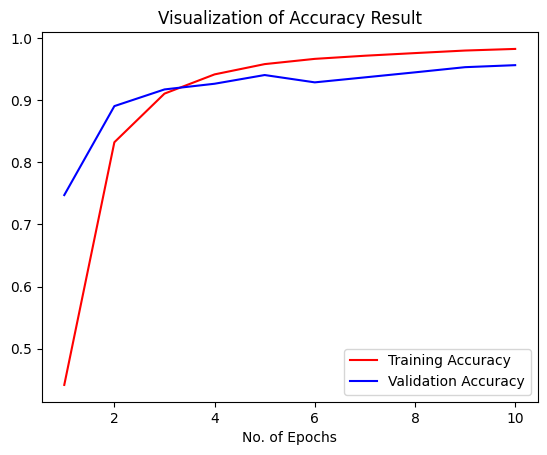

In [50]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [51]:
class_name = validation_set.class_names

In [52]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [53]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 195s 11ms/step


In [54]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [55]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [58]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.97      0.90      0.94       502
                               Blueberry___healthy       0.88      0.99      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

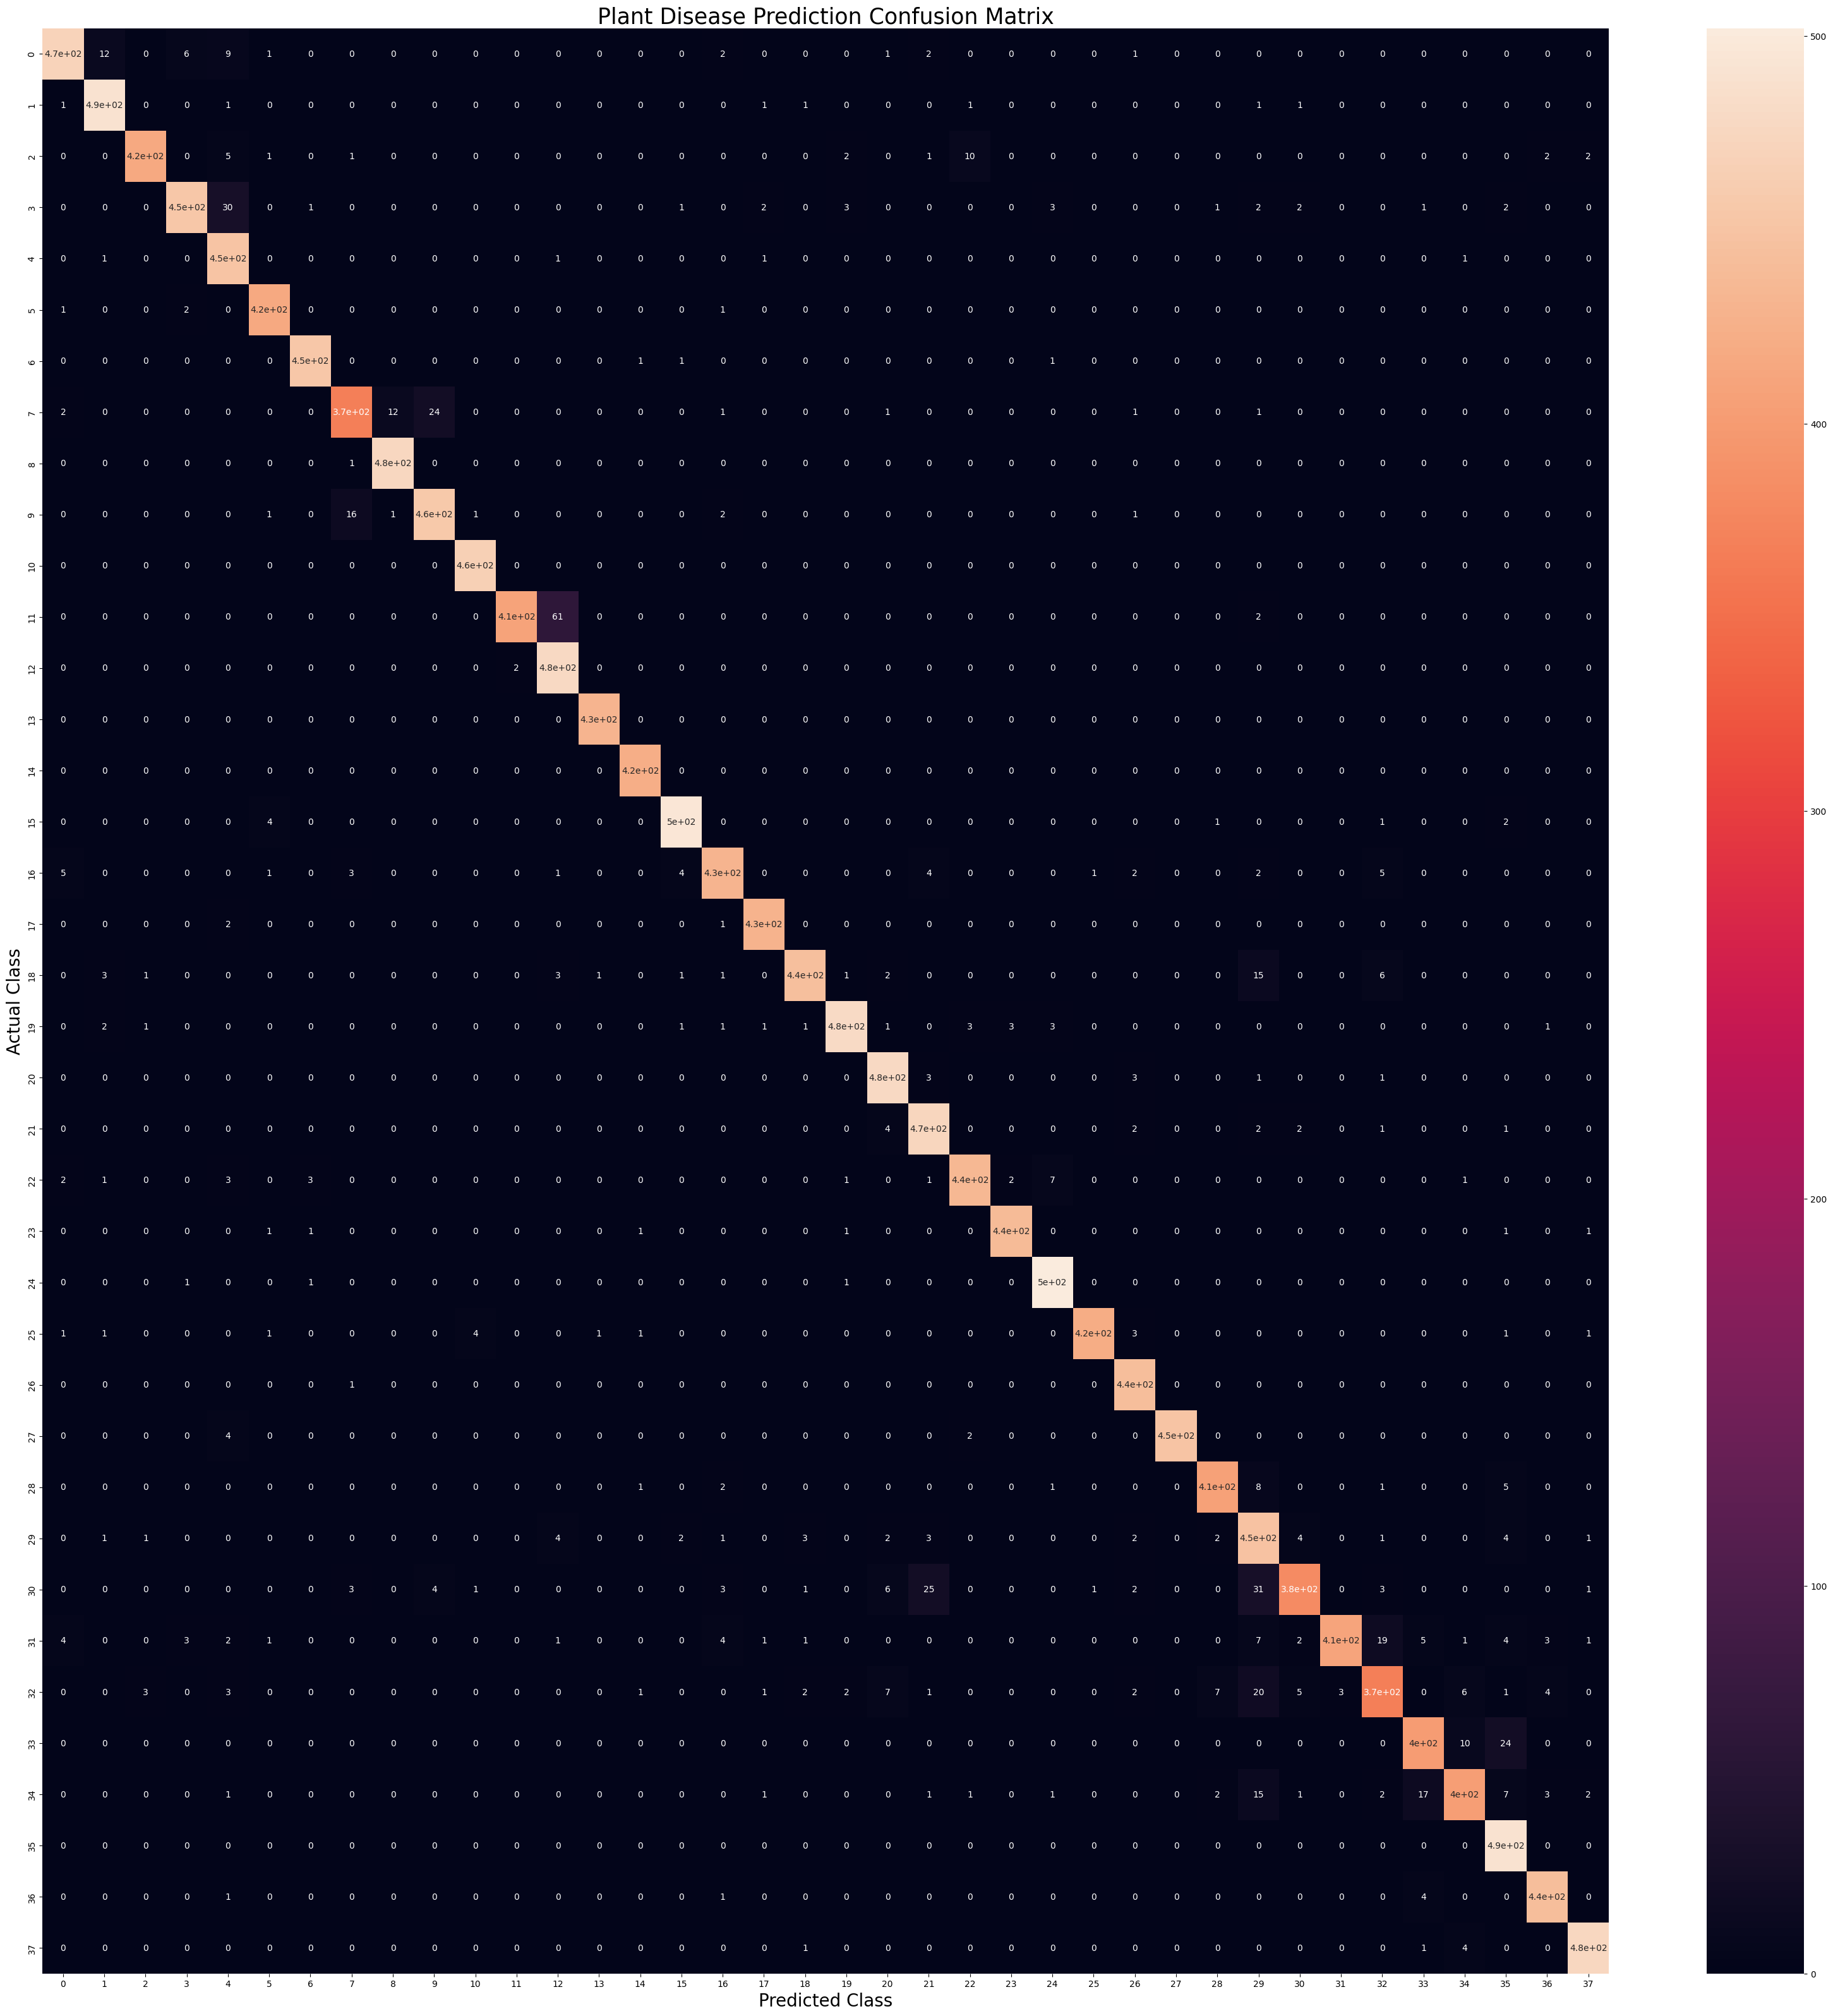

In [59]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [1]:
import tensorflow as tf

# Load your large model
model = tf.keras.models.load_model("trained_plant_disease_model.keras")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the smaller file
with open("plant_disease_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as plant_disease_model.tflite")


INFO:tensorflow:Assets written to: C:\Users\AMITKU~1\AppData\Local\Temp\tmpsxoe8bzu\assets


INFO:tensorflow:Assets written to: C:\Users\AMITKU~1\AppData\Local\Temp\tmpsxoe8bzu\assets


TFLite model saved as plant_disease_model.tflite


In [3]:
import tensorflow as tf

# Load saved .keras model
model = tf.keras.models.load_model("trained_plant_disease_model.keras")

# Convert with INT8 dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quant_model = converter.convert()

with open("plant_disease_model_INT8.tflite", "wb") as f:
    f.write(tflite_quant_model)

print("Quantized TFLite model saved as plant_disease_model_INT8.tflite")


INFO:tensorflow:Assets written to: C:\Users\AMITKU~1\AppData\Local\Temp\tmpup9x8wz5\assets


INFO:tensorflow:Assets written to: C:\Users\AMITKU~1\AppData\Local\Temp\tmpup9x8wz5\assets


Quantized TFLite model saved as plant_disease_model_INT8.tflite
